Retrying the Regression:

The assignment said, use the original data, cleaned and standardize it, to build a Logistic Regression Model.

In [53]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


In [54]:
fumfkins = pd.read_csv("pumpkins.csv")
fumfkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [43]:
new_fumfkins = ['City Name', 'Package', 'Color', 'Low Price', 'High Price', 'Origin', 'Item Size']

fumfkins = fumfkins.drop([c for c in fumfkins if c not in new_fumfkins], axis=1)
fumfkins.dropna(inplace=True)
fumfkins.head()

,City Name,Package,Low Price,High Price,Origin,Item Size,Color
2,BALTIMORE,24 inch bins,160.0,160.0,DELAWARE,med,ORANGE
3,BALTIMORE,24 inch bins,160.0,160.0,VIRGINIA,med,ORANGE
4,BALTIMORE,24 inch bins,90.0,100.0,MARYLAND,lge,ORANGE
5,BALTIMORE,24 inch bins,90.0,100.0,MARYLAND,lge,ORANGE
6,BALTIMORE,36 inch bins,160.0,170.0,MARYLAND,med,ORANGE


In [44]:
fumfkins = fumfkins.apply(LabelEncoder().fit_transform)

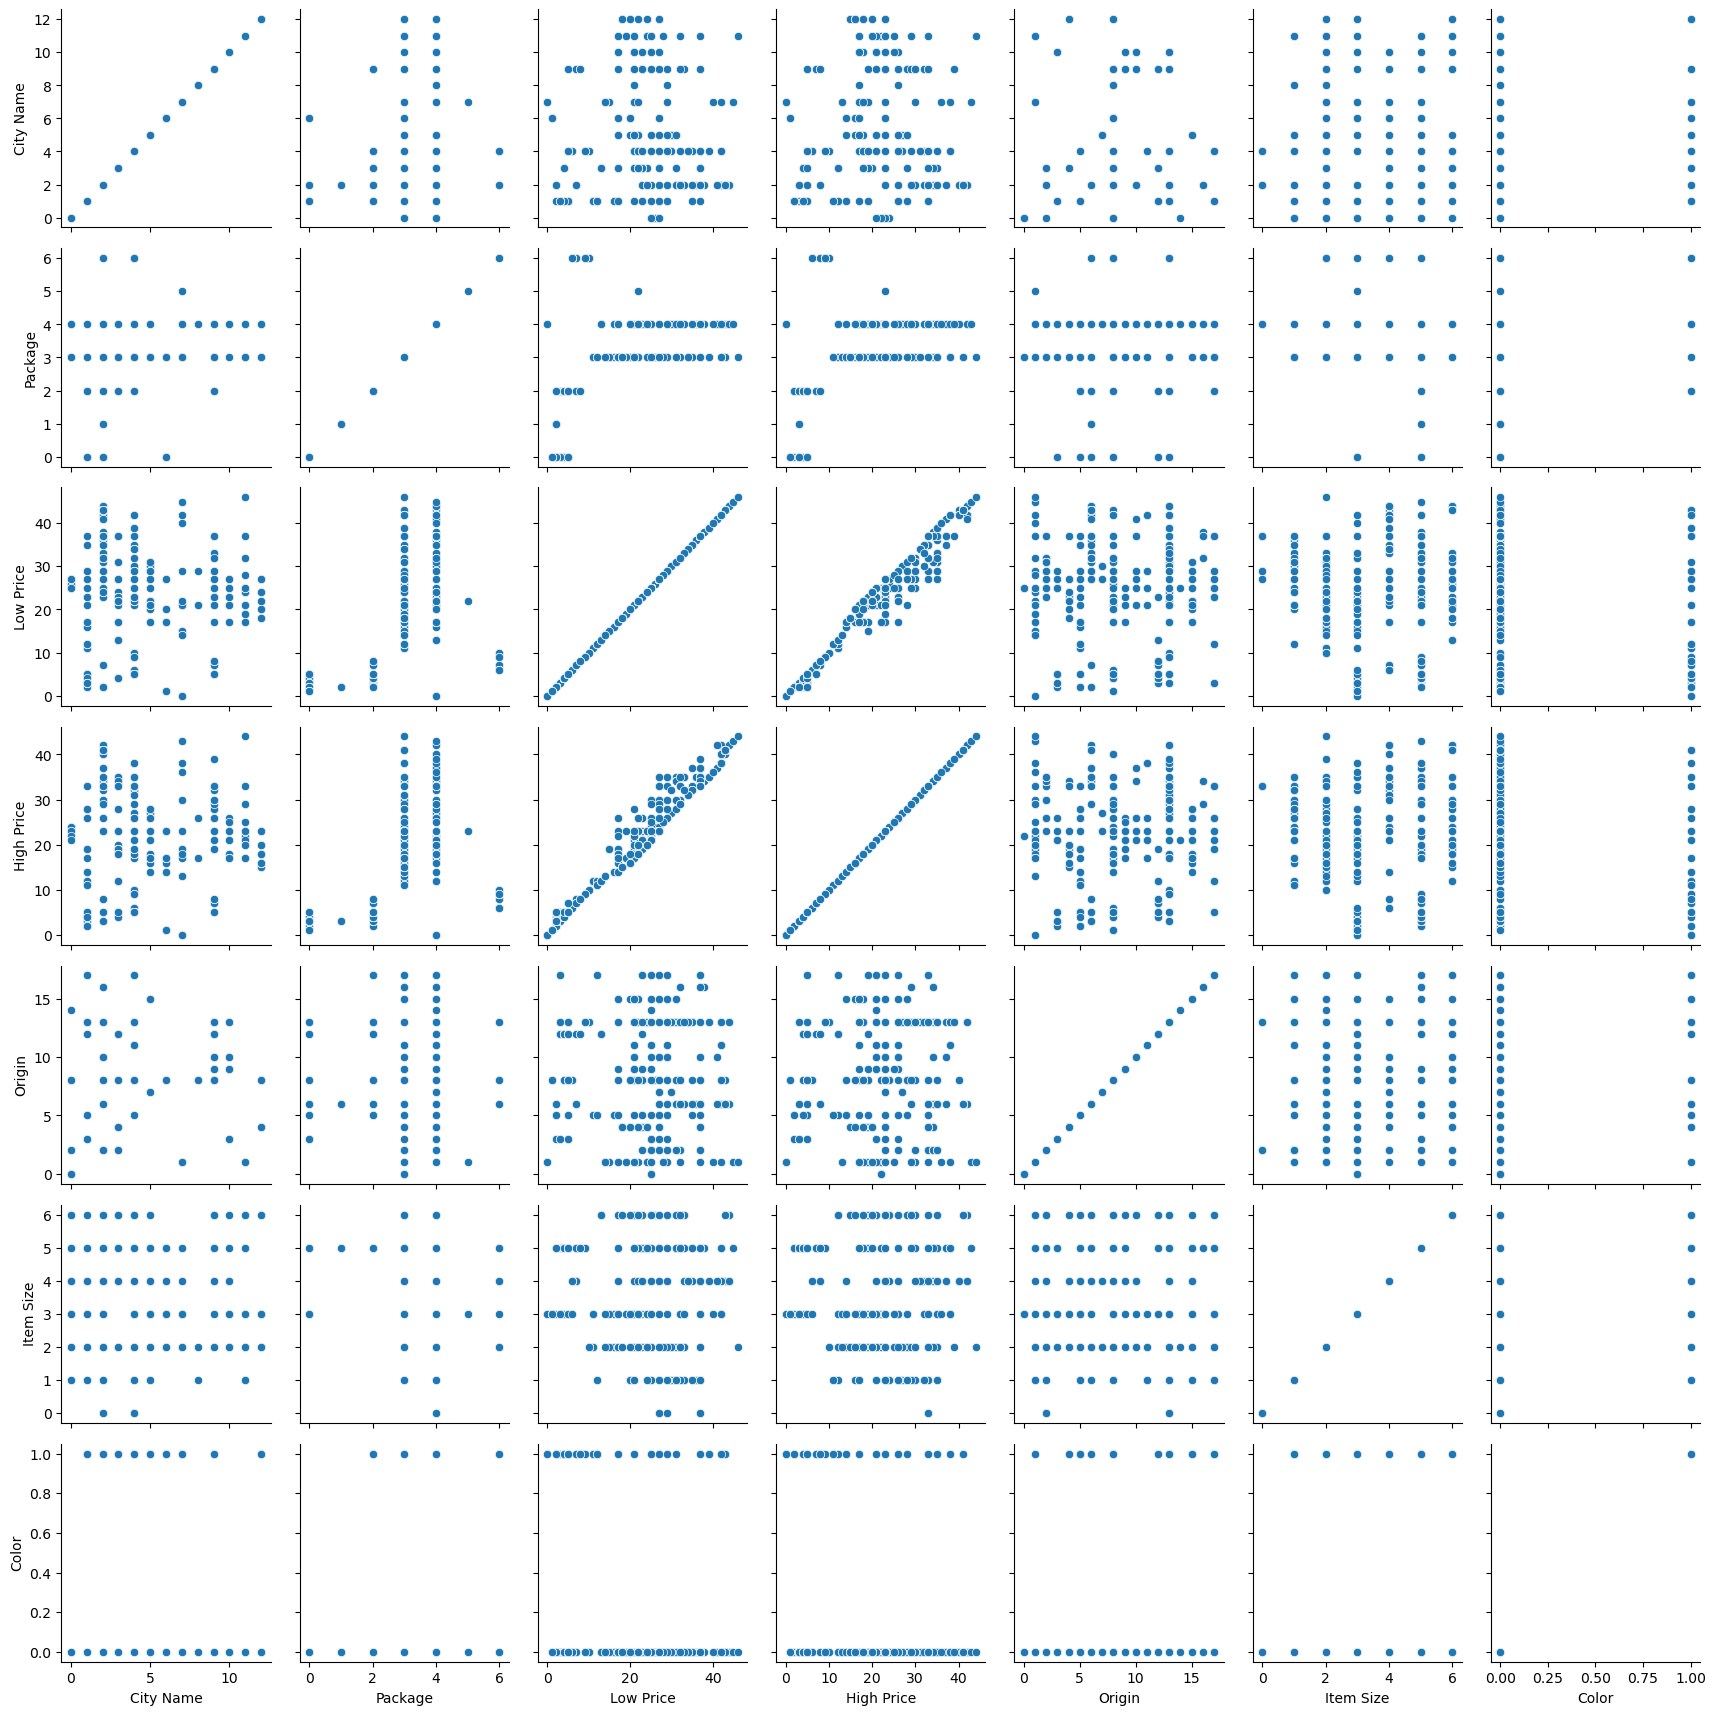

In [45]:
grid = sns.PairGrid(fumfkins)
grid.map(sns.scatterplot)
plt.show()

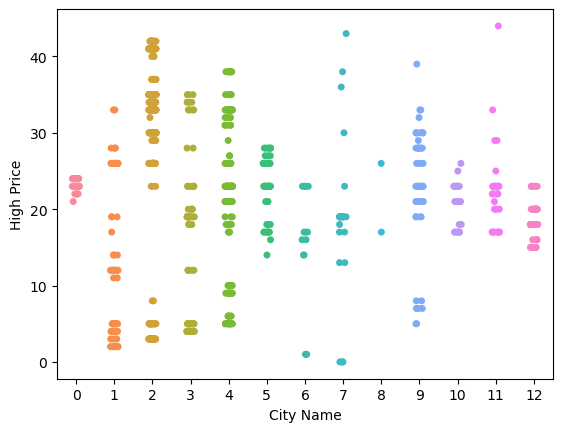

In [47]:
sns.stripplot(x='City Name', y="High Price", data=fumfkins)
plt.show()

c:\Users\PC\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\PC\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


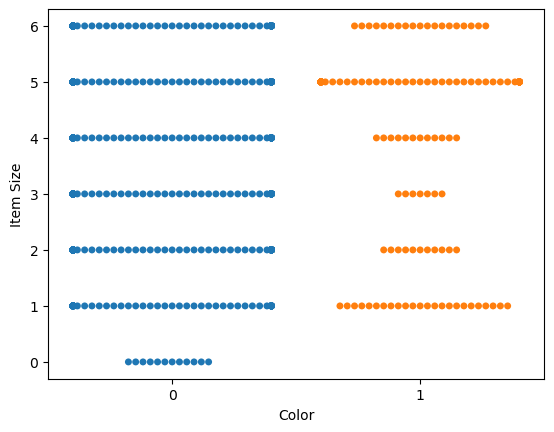

In [50]:
sns.swarmplot(x='Color', y="Item Size", data=fumfkins)
plt.show()

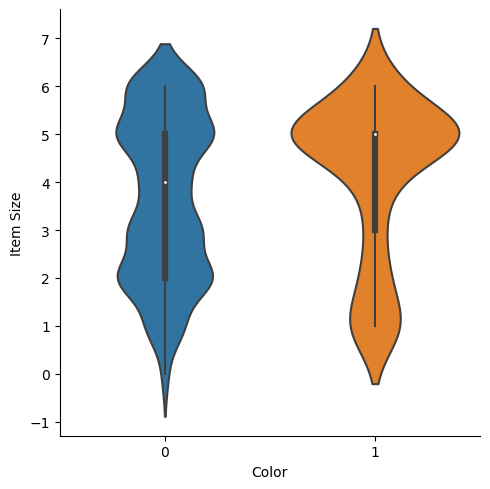

In [51]:
sns.catplot(x='Color', y='Item Size', kind='violin', data=fumfkins)
plt.show()

In [99]:
choosen_features = ['High Price', 'Low Price',]
#'Origin', 'Item Size', 'Variety', 'City Name', 'Package'
x = fumfkins[choosen_features]
y = fumfkins['City Name']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [100]:
model = LogisticRegression()
model.fit(x_train, y_train)
pridicts = model.predict(x_test)

print(classification_report(y_test, pridicts))
print('Predicted labels: ', pridicts)
print('Accuracy: ', accuracy_score(y_test, pridicts))

               precision    recall  f1-score   support

      ATLANTA       0.00      0.00      0.00        11
    BALTIMORE       0.00      0.00      0.00        32
       BOSTON       0.47      0.85      0.60        74
      CHICAGO       0.27      0.14      0.18        50
     COLUMBIA       0.26      0.96      0.41        52
       DALLAS       0.00      0.00      0.00        32
      DETROIT       0.00      0.00      0.00        10
  LOS ANGELES       0.00      0.00      0.00        11
     NEW YORK       0.00      0.00      0.00        24
 PHILADELPHIA       0.00      0.00      0.00         6
SAN FRANCISCO       0.00      0.00      0.00        31
    ST. LOUIS       0.00      0.00      0.00        19

     accuracy                           0.34       352
    macro avg       0.08      0.16      0.10       352
 weighted avg       0.18      0.34      0.21       352

Predicted labels:  ['COLUMBIA' 'COLUMBIA' 'BOSTON' 'BOSTON' 'COLUMBIA' 'COLUMBIA' 'COLUMBIA'
 'COLUMBIA' 'COLUMBIA' '

c:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [101]:
confusion_matrix(y_test, pridicts)

array([[ 0,  0,  6,  2,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 12,  2, 18,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 63,  8,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  8,  7, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  1, 26,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  5,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 17,  0,  7,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  4,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 11,  1, 19,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  5,  0, 14,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)